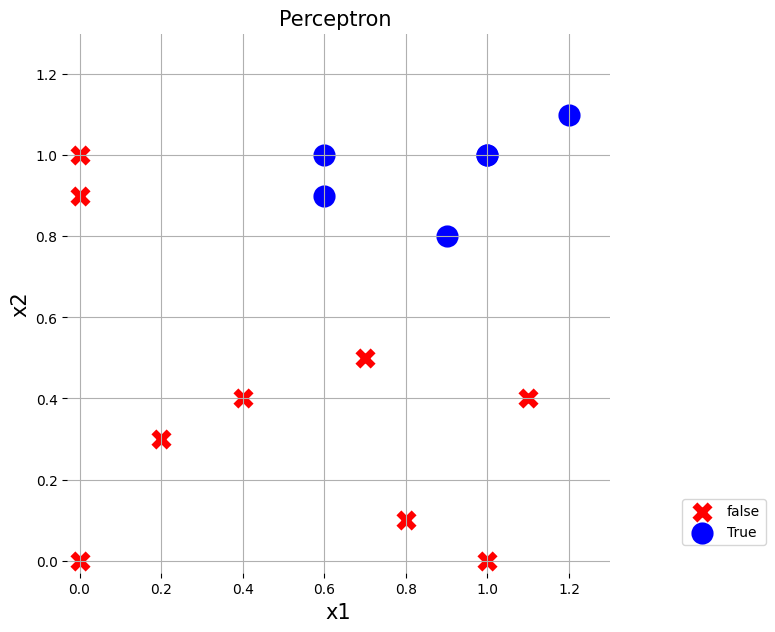

In [25]:
# Este codigo solo muestra los puntos clasifiacados segun su clase
import numpy as np
import matplotlib.pyplot as plt

# compuerta AND ->   [x1, x2]
individuo = np.array([[1, 0],       # Clase -1 (False)
                      [0, 1],       # Clase -1 (False)
                      [0, 0],       # Clase -1 (False)
                      [1, 1],       # Clase 1 (True)
                      [0.2, 0.3],   # Clase -1 (False)
                      [0.8, 0.1],   # Clase -1 (False)
                      [0.0, 0.9],   # Clase -1 (False)
                      [1.1, 0.4],   # Clase -1 (False)
                      [0.6, 0.9],   # Clase 1 (True)
                      [1.0, 1.0],   # Clase 1 (True)
                      [0.9, 0.8],   # Clase 1 (True)
                      [0.4, 0.4],   # Clase -1 (False)
                      [1.2, 1.1],   # Clase 1 (True)
                      [0.7, 0.5],   # Clase -1 (False) 
                      [0.6, 1],     # Clase -1 (False) 
                              ])
                # 1 : true    -1 : false
clases = np.array([-1, -1, -1, 1,-1, -1, -1, -1, 1, 1, 1, -1, 1, -1,1])

# Gráfica de dispersión (x1, x2)
plt.figure(figsize=(7, 7))
plt.title("Perceptron ", fontsize=15)
plt.scatter(individuo [clases == -1].T[0], 
            individuo [clases == -1].T[1], 
            marker="x", s=120, color="red",
            linewidths=5, label="false")
plt.scatter(individuo [clases == 1].T[0],
            individuo [clases == 1].T[1], 
            marker="o", s=120, color="blue",
            linewidths=5, label="True")
plt.xlabel("x1", fontsize=15)
plt.ylabel("x2", fontsize=15)
plt.legend(bbox_to_anchor=(1.3, 0.15))
plt.box(False)
plt.xlim((-0.03, 1.3))
plt.ylim((-0.03, 1.3))
plt.grid()
plt.show()


--- Epoca: 1 ---
Iteracion: 1
num1: 1.0 num2: 0.0
Y: -0.5
Clase: -1
No actualizo pesos, ni bias
Iteracion: 2
num1: 0.0 num2: 1.0
Y: -1.5
Clase: -1
No actualizo pesos, ni bias
Iteracion: 3
num1: 0.0 num2: 0.0
Y: -1.0
Clase: -1
No actualizo pesos, ni bias
Iteracion: 4
num1: 1.0 num2: 1.0
Y: -1.0
Clase: -1
Actualizo pesos y bias
w1: 0.7 w2: -0.3 b: -0.8
Iteracion: 5
num1: 0.2 num2: 0.3
Y: -0.75
Clase: -1
No actualizo pesos, ni bias
Iteracion: 6
num1: 0.8 num2: 0.1
Y: -0.27000000000000013
Clase: -1
No actualizo pesos, ni bias
Iteracion: 7
num1: 0.0 num2: 0.9
Y: -1.07
Clase: -1
No actualizo pesos, ni bias
Iteracion: 8
num1: 1.1 num2: 0.4
Y: -0.15000000000000002
Clase: -1
No actualizo pesos, ni bias
Iteracion: 9
num1: 0.6 num2: 0.9
Y: -0.6500000000000001
Clase: -1
Actualizo pesos y bias
w1: 0.82 w2: -0.11999999999999997 b: -0.6000000000000001
Iteracion: 10
num1: 1.0 num2: 1.0
Y: 0.09999999999999987
Clase: 1
No actualizo pesos, ni bias
Iteracion: 11
num1: 0.9 num2: 0.8
Y: 0.04199999999999992

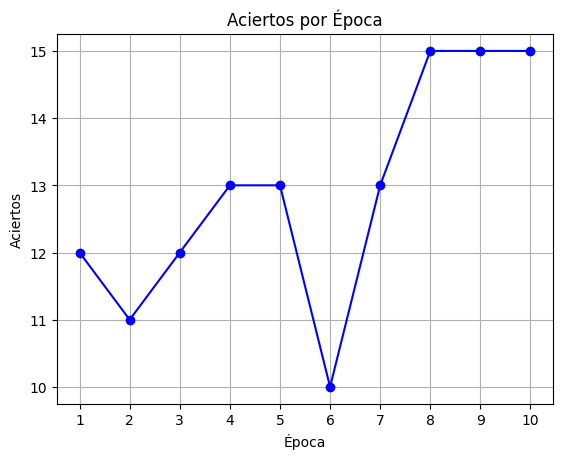

In [23]:
# Este codigo ejecuta las epocas definidas en el while.
# Evalua la funcion de activacion y verifica si la prediccion es correcta
# y grafica aciertos por epoca

# pesos    se pueden cambiar
w1 = 0.5
w2 = -0.5
# bias   se puede cambiar
b = -1
# parámetro de aprendizaje  se puede cambiar
pa =0.2
# épocas 
epocas = 0
contaSinError = 0
longitud = len(clases)
numEpocas=10 # aqui se cambia el numero de epocas
# guarda los aciertos de cada epoca
aciertos = []
while epocas != numEpocas:   
    print("\n--- Epoca:", epocas+1, "---")
    for i in range(individuo.shape[0]):
        print("Iteracion:", i + 1)  # Imprimir el índice de la fila
        print("num1:", individuo[i, 0], "num2:", individuo[i, 1])
        y = (w1 * individuo[i, 0] + w2 * individuo[i, 1]) + b
        print("Y:", y)

        # Función de activación
        if y >= 0:
            y = 1
            print("Clase:", y)
        else:
            y = -1
            print("Clase:", y)
        # Verificar si la predicción es correcta
        
        if y == clases[i]:
            print("No actualizo pesos, ni bias")
            contaSinError += 1
        else:
            print("Actualizo pesos y bias")
            #contaSinError = 0
            w1 = w1 + pa * clases[i] * individuo[i, 0]
            w2 = w2 + pa * clases[i] * individuo[i, 1]
            b = b + pa * clases[i]
            print("w1:", w1, "w2:", w2, "b:", b)

    # Incrementar épocas después de recorrer todos los individuos
    epocas += 1
    print("Epocas:", epocas, "Clasifico correctamente:", contaSinError, "de",longitud)
    aciertos.append(contaSinError)
    # print("aciertos [epocas]:", "[",aciertos,"]") # muestra los valores de el arreglo aciertos
    contaSinError = 0

# Crear la gráfica de aciertos por epoca
epocas = range(1, len(aciertos) + 1)
plt.plot(epocas, aciertos, marker='o', linestyle='-', color='b')  # Línea con puntos marcados
plt.title('Aciertos por Época')  # Título de la gráfica
plt.xlabel('Época')  # Etiqueta del eje X
plt.ylabel('Aciertos')  # Etiqueta del eje Y
plt.grid(True)  # Agregar una cuadrícula para mejor visualización
plt.xticks(epocas)  # Asegurar que las épocas se muestren correctamente en el eje X
plt.show()  # Mostrar la gráfica

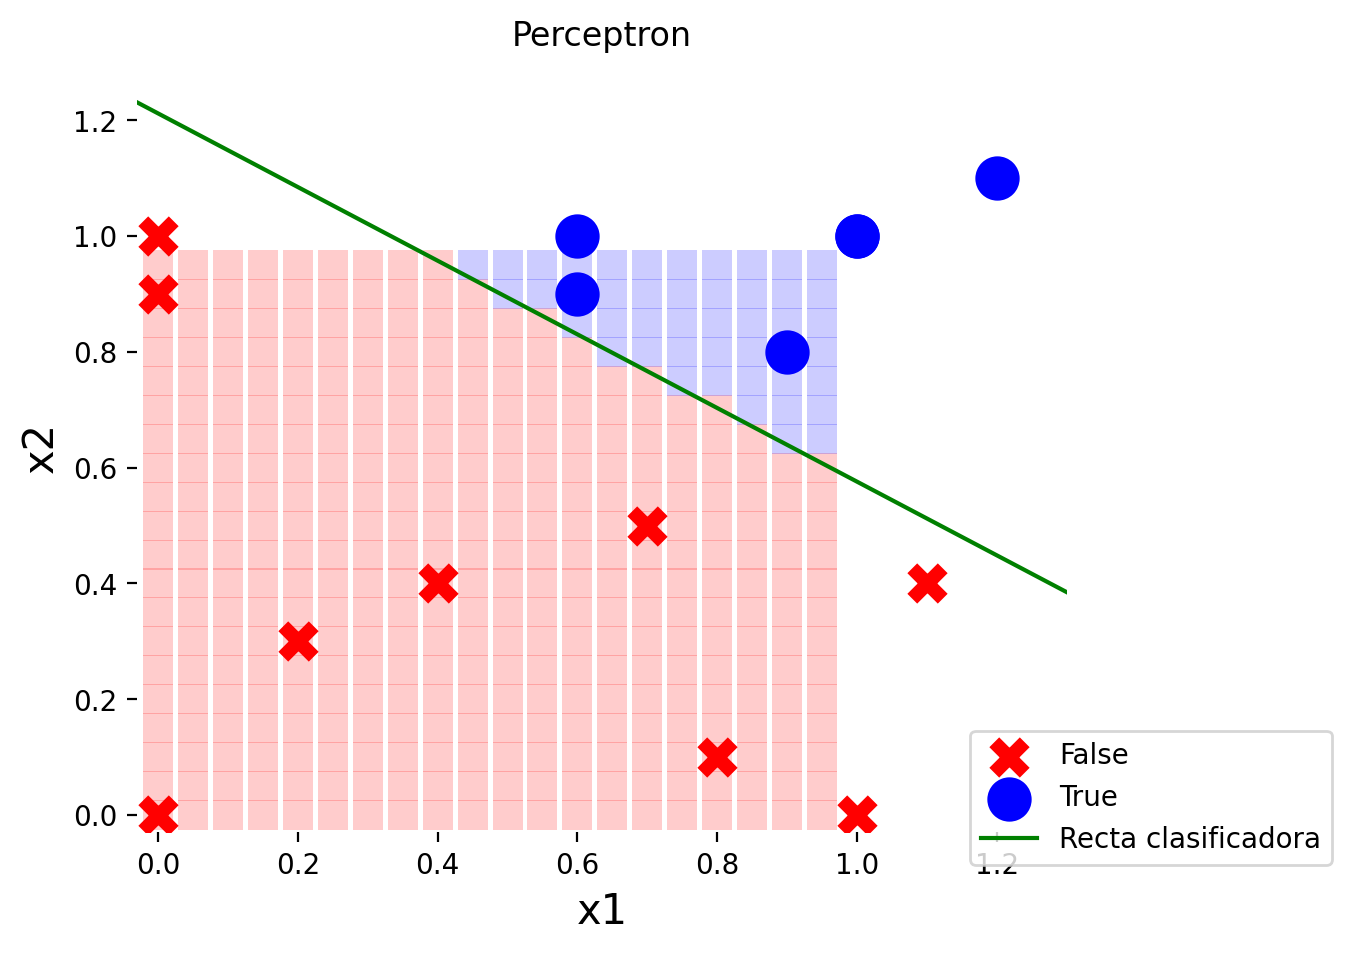

In [24]:
# Este codigo muestra el ajuste final de la recta que clasifica las clases 
def validar_entrada(mensaje):
    while True:
        try:
            valor = float(input(mensaje))
            if 0 <= valor <= 1.9:
                return valor
            else:
                print("Error: El valor debe estar entre 0 y 1. Intente nuevamente.")
        except ValueError:
            print("Error: Ingrese un número válido.")

# Crear la figura
plt.figure(figsize=(6, 5), dpi=200)
plt.title("Perceptron", fontsize=12)

# Graficar los puntos de entrada
plt.scatter(individuo[clases == -1].T[0], 
            individuo[clases == -1].T[1], 
            marker="x", s=120, color="red",
            linewidths=5, label="False")
plt.scatter(individuo[clases == 1].T[0],
            individuo[clases == 1].T[1], 
            marker="o", s=120, color="blue",
            linewidths=5, label="True")

# Generar y graficar la región de decisión
for x1 in np.arange(0, 1, 0.05):
    for x2 in np.arange(0, 1, 0.05):
        # Calcular el valor de y
        y = (w1 * x1 + w2 * x2) + b
        
        # Función de activación
        if y >= 0:
            color = "blue"  # Clase 1
        else:
            color = "red"   # Clase -1
        
        # Graficar el punto
        plt.scatter(x1, x2, marker="s", s=110,
                    color=color, alpha=0.2, linewidths=0)
# Calcular recta 
r1 = (-(b/w1)) * np.array([1, 0])  # Punto donde x2 = 0
r2 = (-(b/w2)) * np.array([0, 1])  # Punto donde x1 = 0
# Graficar la recta
plt.axline((r1[0], r1[1]), (r2[0], r2[1]), color="green", label="Recta clasificadora")

# Configuraciones adicionales del gráfico
plt.xlabel("x1", fontsize=15)
plt.ylabel("x2", fontsize=15)
plt.legend(bbox_to_anchor=(1.3, 0.15))
plt.box(False)
plt.xlim((-0.03,1.3))
plt.ylim((-0.03,1.3))
plt.show()

In [8]:
# Con este codigo podemos saber a que clase pertence un punto ingresando un valor a x1 y a x2
x1 = validar_entrada("Ingrese x1 con un valor entre 0 y 1: ")
x2 = validar_entrada("Ingrese x2 con un valor entre 0 y 1: ")
y = (w1 * x1 + w2 * x2) + b
if y >= 0:
    print("Pertenece a la Clase: True(1)")
else:
    print("Pertenece a la Clase: False(-1)")

Ingrese x1 con un valor entre 0 y 1:  0.9
Ingrese x2 con un valor entre 0 y 1:  0.6


Pertenece a la Clase: False(-1)
